<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/Regression_guessing_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

보스턴 주택 가격 데이터셋은 연속적인 값을 예측하는 회귀(regression) 문제이다.

# 1. 데이터 살펴보기

In [23]:
# 보스턴 주택 가격 데이터셋 다운받기
from tensorflow.keras.datasets.boston_housing import load_data

# 데이터를 다운한다.
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

In [24]:
# 데이터 형태 확인
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [25]:
y_train[:10]

array([22.5,  8.3, 17.2, 25. , 28.5, 23. , 18.9, 50. , 15.6, 38.7])

데이터는 13개의 특성이 있고, 레이블은 주택 가격의 중간 가격($1000 단위)을 나타낸다. 이 전에 다루었던 데이터셋처럼 특성의 스케일이 모두 동일하면 좋겠지만, 이번 데이터셋은 그렇지 않다. 예를 들어, 범죄율 같은 특성은 비율을 나타내기에 0~1의 값을 가지지만, 방의 개수 같은 경우는 3~9의 범위를 갖는다. 이러한 스케일의 문제는 신경망의 성능에 큰 영향을 미친다. 따라서 각 데이터 특성이 갖는 범위가 다를 때에는 범위가 동일하도록 조정해야만 한다. 이러한 문제를 해결할 때 대표적으로 사용하는 방법은 표준화(Standardization)를 수행하는 것이다.

표준화는 각 데이터의 특성에 대해서 평균을 빼고, 표준펹차로 나누어 준다. 이는 특성의 평균을 0으로, 표준편차를 1로 만들어준다.

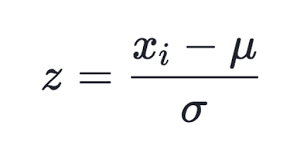

In [27]:
# 데이터 전처리 및 검증 데이터셋 만들기
import numpy as np

# 데이터 표준화
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

# 검증 데이터셋을 만든다.
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 777)

위의 코드에서 주의해야 할 부분은 테스트셋의 전처리 과정에서 별도의 평균과 표준편차를 구하지 않고, 학습 데이터셋에서 얻은 평균과 표준편차를 사용하여 전처리를 진행했다는 점이다.

# 2. 모델 구성하기